# Exploratory Data Analysis
This Notebook will contain the report of the Exploratory Data Analysis phase of the project.

The aforementioned process follows the following steps:

1.   Import Dataset, Headers & Libraries.
2.   Identify Missing Data.
3.   Replace Missing Data.
4.   Evaluate Missing Data.
5.   Dealing with Missing Data.
6.   Correct Data Formats.
7.   Data standardization.
8.   Binning.
9.   Data Normalization.
10.  Indicator variable.












# Step 1 - Importing Dataset, Headers & Libraries

In order to keep our project more accessible, we decided to work entirely by using the software provided by Google, that is Google Colab and the Google Drive platform.

The following code snippets imports the Python Libraries that will be used in this Notebook and sets the enviroments for the future use.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
!pip install lux-api

  Using cached lux-api-0.5.1.tar.gz (127 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 280 kB 5.0 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
     |████████████████████████████████| 2.5 MB 47.0 MB/s 
     |████████████████████████████████| 40 kB 1.9 MB/s 
     |████████████████████████████████| 42 kB 859 kB/s 
  Created wheel for lux-api: filename=lux_api-0.5.1-py3-none-any.whl size=185620 sha256=3682792b8908740a4e571d3a11ddc507710409f5f21076188b5fb8795221af6e
  Stored in directory: /root/.cache/pip/wheels/30/50/dc/d963e60d29e93842892c038df8d1a2bf50df51be4ac3b1dfb2
  Created wheel for lux-widget: filename=lux_widget-0.1.11-py3-none-any.whl size=2540459 sha256=a3cc99f8d7d3ebdb7d7e2b0ef36040595218c1738157eba6eb447c019ce6ee5c
  Stored in directory: /root/.cache/pip/wheels/6d/28/de/98e9984ee5fa0b2fc084870ee09eb0bb3488b8d2c2b0788db5
Successfully built

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import lux
df_2016 = pd.read_csv('/gdrive/MyDrive/Progetto DWM/Data/properties_2016.csv', low_memory = False)
df_2017 = pd.read_csv('/gdrive/MyDrive/Progetto DWM/Data/properties_2017.csv', low_memory = False)
train_2016 = pd.read_csv('/gdrive/MyDrive/Progetto DWM/Data/train_2016_v2.csv', low_memory = False)
train_2017 = pd.read_csv('/gdrive/MyDrive/Progetto DWM/Data/train_2017.csv', low_memory = False)

In [ ]:
# Getting information on the types of the columns
df_2016.info()
print('\n')
df_2017.info()
print('\n')
train_2016.info()
print('\n')
train_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsquarefeet15          float64
 15  finishedsquarefeet50          float64
 16  finishedsquarefeet6           float64
 17  fips                          float64
 18  fireplacecnt          

The next step is the joining of the "properties" dataframes with their relative "train" dataset, by using a NATURAL JOIN on the "parcel_id" feature.

In [ ]:
df_2016 = df_2016.set_index('parcelid').join(train_2016.set_index('parcelid'), how = 'inner', on = 'parcelid', lsuffix = '_l')
df_2017 = df_2017.set_index('parcelid').join(train_2017.set_index('parcelid'), how = 'inner', on = 'parcelid', lsuffix = '_l')

# Step 2 - Identify Missing Data

The goal of this task is to identify the columns of the dataset(s) that contain a relevant number of missing values.

This step is necessary in order to eventually drop the columns that will be considered irrelevant to the means of the prediction.

In [ ]:
# Getting information on the types of the columns
df_2016.info()
print('\n')
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   0 non-null      object 
 1   bedroomcnt                    0 non-null      object 
 2   buildingqualitytypeid         0 non-null      float64
 3   calculatedbathnbr             0 non-null      object 
 4   calculatedfinishedsquarefeet  0 non-null      float64
 5   finishedsquarefeet12          0 non-null      float64
 6   fips                          0 non-null      float64
 7   fullbathcnt                   0 non-null      object 
 8   heatingorsystemtypeid         0 non-null      float64
 9   latitude                      0 non-null      float64
 10  longitude                     0 non-null      float64
 11  lotsizesquarefeet             0 non-null      float64
 12  propertycountylandusecode     0 non-null      object 
 13  propertylandusety

In [ ]:
print('2016 Dataset')
for col in df_2016:
    print(df_2016[col].value_counts(dropna=False))


2016 Dataset
NaN     61494
1.0     26668
13.0     1833
5.0       215
11.0       63
9.0         1
3.0         1
Name: airconditioningtypeid, dtype: int64
NaN     90014
7.0       221
8.0        16
2.0        11
21.0        8
3.0         4
10.0        1
Name: architecturalstyletypeid, dtype: int64
NaN       90232
1528.0        3
1312.0        2
700.0         2
198.0         1
493.0         1
1048.0        1
540.0         1
100.0         1
515.0         1
510.0         1
564.0         1
771.0         1
162.0         1
608.0         1
312.0         1
913.0         1
1555.0        1
671.0         1
1210.0        1
585.0         1
579.0         1
616.0         1
184.0         1
1350.0        1
676.0         1
831.0         1
234.0         1
485.0         1
814.0         1
760.0         1
196.0         1
690.0         1
238.0         1
802.0         1
168.0         1
330.0         1
1551.0        1
260.0         1
557.0         1
Name: basementsqft, dtype: int64
2.0     36534
3.0     19946
1.0

In [ ]:
print('2017 Dataset')
for col in df_2017:
    print(df_2017[col].value_counts(dropna=False))

2017 Dataset
NaN     52606
1.0     23186
13.0     1575
5.0       167
11.0       53
9.0        26
Name: airconditioningtypeid, dtype: int64
NaN     77406
7.0       173
8.0        19
21.0        7
2.0         5
3.0         3
Name: architecturalstyletypeid, dtype: int64
NaN       77563
100.0         2
900.0         2
515.0         2
912.0         2
700.0         2
640.0         2
273.0         2
38.0          1
200.0         1
224.0         1
1969.0        1
405.0         1
604.0         1
112.0         1
3112.0        1
352.0         1
1218.0        1
588.0         1
280.0         1
252.0         1
3560.0        1
300.0         1
669.0         1
512.0         1
394.0         1
314.0         1
168.0         1
1252.0        1
396.0         1
674.0         1
819.0         1
204.0         1
800.0         1
1416.0        1
384.0         1
90.0          1
380.0         1
254.0         1
600.0         1
1809.0        1
645.0         1
786.0         1
126.0         1
Name: basementsqft, dtype: i

The analysis of the value count has underlined that some columns contain an high percentage of missing values, encoded as "NaN", in  both datasets. 

The following snippets will list all columns with the relative percentage of NaN values for each dataset. The columns that will present a percentage of missing values above 15% will be saved for later use.  

In [ ]:
print('2016 Dataset')
not_to_drop = ['bathroomcnt', 'threequarterbathnbr', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'regionidcounty', 'regionidcity', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'calculatedbathnbr', 'fips', 'parcelid', 'propertycountylandusecode', 'propertylandusetypeid', 'rawcensustractandblock', 'censustractandblock', 'taxvaluedollarcnt', 'taxamount', 'assessmentyear','logerror','transactiondate']
to_drop = []
for col in df_2016:
    column_report = df_2016[col].value_counts(dropna=False)
    column_size = df_2016[col].size
    column_not_NaN = df_2016[col].count(level = None)
    empty_percentage = 100 * (column_size - column_not_NaN) / column_size
    if empty_percentage >= 15.0 and col not in not_to_drop:
      to_drop.append(col)
    print(f"[{df_2016[col].name}] {empty_percentage}%")


2016 Dataset
[airconditioningtypeid] 68.1185267238992%
[architecturalstyletypeid] 99.71088341179728%
[basementsqft] 99.95236776516201%
[bathroomcnt] 0.0%
[bedroomcnt] 0.0%
[buildingclasstypeid] 99.9822763777347%
[buildingqualitytypeid] 36.45638327333149%
[calculatedbathnbr] 1.3093325948490724%
[decktypeid] 99.27111603433951%
[finishedfloor1squarefeet] 92.40542785931875%
[calculatedfinishedsquarefeet] 0.7322071448352258%
[finishedsquarefeet12] 5.183051786208806%
[finishedsquarefeet13] 99.96344502907782%
[finishedsquarefeet15] 96.05206314040431%
[finishedsquarefeet50] 92.40542785931875%
[finishedsquarefeet6] 99.53364718914428%
[fips] 0.0%
[fireplacecnt] 89.35807255607865%
[fullbathcnt] 1.3093325948490724%
[garagecarcnt] 66.83799501523124%
[garagetotalsqft] 66.83799501523124%
[hashottuborspa] 97.38022708391027%
[heatingorsystemtypeid] 37.87870396012185%
[latitude] 0.0%
[longitude] 0.0%
[lotsizesquarefeet] 11.243422874549987%
[poolcnt] 80.17058986430352%
[poolsizesum] 98.92661312655774%
[p

The following snippet will plot an histogram representing the current situation of missing data.

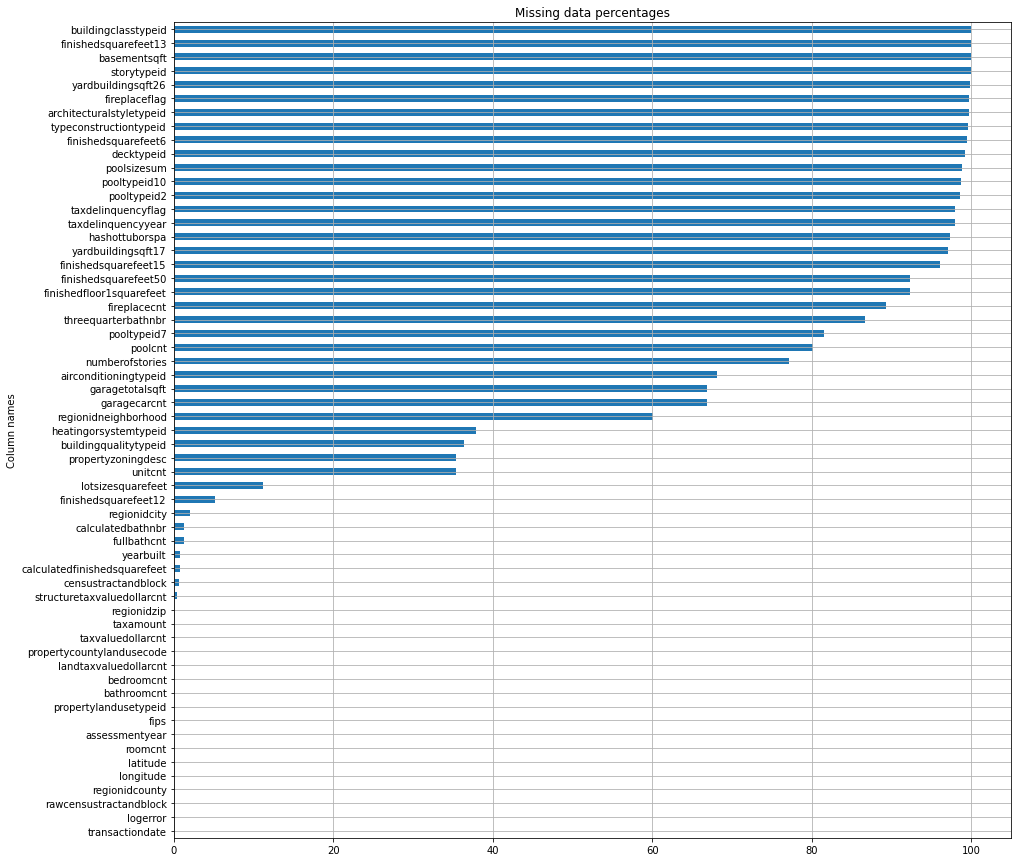

In [ ]:
df_missing = df_2016.isnull().sum(axis = 0) * 100 / len(df_2016)
df_missing = df_missing.sort_values()
df_missing.plot(kind ='barh', grid =True, title ='Missing data percentages', xlabel ='Column names', ylabel ='Percentages', figsize =(15,15))

# Step 3 - Dealing with Missing Data
During this step all the missing data will be converted to a coherent notation.

Before erasing any data, we will substitute some feature that present high percentages of missing data will be transformed:

* 'bathroomcnt'
* 'bedroomcnt'
* 'fullbathcnt'
* 'calculatedbathnbr'
* 'threequarterbathnbr'

These features in particular count the number of bathrooms contained in the house: it is safe to assume that if some data is missing probably the meaning is zero, so when a cell is filled with a null value, it will changed to 0.

The columns that present more than 15% of missing data will be dropped, since no possible conclusion could be drawn from them.


The following snippets will change all the missing values in the aforementioned columns to another value.

In [ ]:
to_zero = ['bathroomcnt', 'bedroomcnt', 'fullbathcnt', 'calculatedbathnbr', 'threequarterbathnbr'] #The cells of these columns will be converted to zero.
for col in to_zero:
  df_2016[col] = df_2016[col].fillna(0, inplace=True)
  df_2017[col] = df_2017[col].fillna(0, inplace=True)


The following snippet will list the column that will be drop.

In [ ]:
print("Dropping columns:")
for col in to_drop:
  print(f"[{col}]")

df_2016 = df_2016.drop(columns =to_drop)

Dropping columns:
[airconditioningtypeid]
[architecturalstyletypeid]
[basementsqft]
[buildingclasstypeid]
[decktypeid]
[finishedfloor1squarefeet]
[finishedsquarefeet13]
[finishedsquarefeet15]
[finishedsquarefeet50]
[finishedsquarefeet6]
[fireplacecnt]
[garagecarcnt]
[garagetotalsqft]
[hashottuborspa]
[poolcnt]
[poolsizesum]
[pooltypeid10]
[pooltypeid2]
[pooltypeid7]
[propertyzoningdesc]
[regionidneighborhood]
[storytypeid]
[typeconstructiontypeid]
[yardbuildingsqft17]
[yardbuildingsqft26]
[numberofstories]
[fireplaceflag]
[taxdelinquencyflag]
[taxdelinquencyyear]


Now that the columns are in a consistent state, we have to drop the empty rows.

In [ ]:
df_2016 = df_2016.dropna()

In [ ]:
print("What follows is the current state of the dataset:")
df_2016.info()

What follows is the current state of the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   0 non-null      object 
 1   bedroomcnt                    0 non-null      object 
 2   buildingqualitytypeid         0 non-null      float64
 3   calculatedbathnbr             0 non-null      object 
 4   calculatedfinishedsquarefeet  0 non-null      float64
 5   finishedsquarefeet12          0 non-null      float64
 6   fips                          0 non-null      float64
 7   fullbathcnt                   0 non-null      object 
 8   heatingorsystemtypeid         0 non-null      float64
 9   latitude                      0 non-null      float64
 10  longitude                     0 non-null      float64
 11  lotsizesquarefeet             0 non-null      float64
 12  propertycountylandusecode 

#Step 4 - Outliers identifications

Now that our dataset is clean, the values will be plotted by columns, in order to identify the distribution of the data.



[bathroomcnt]
TypeError
[bedroomcnt]
TypeError
[buildingqualitytypeid]


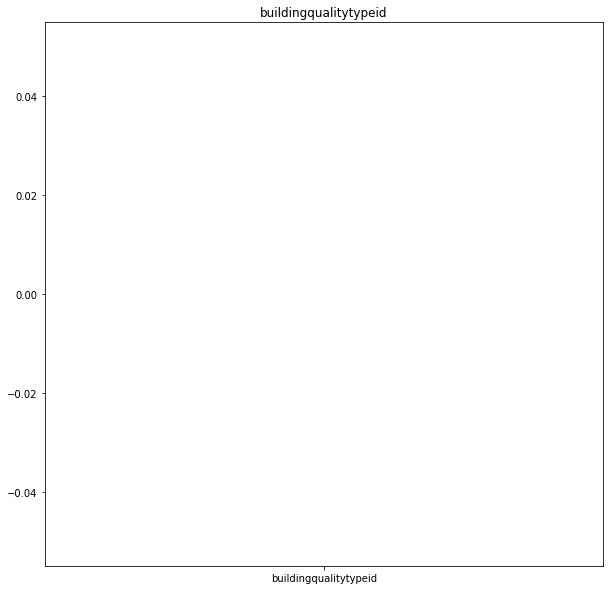

[calculatedbathnbr]
TypeError
[calculatedfinishedsquarefeet]


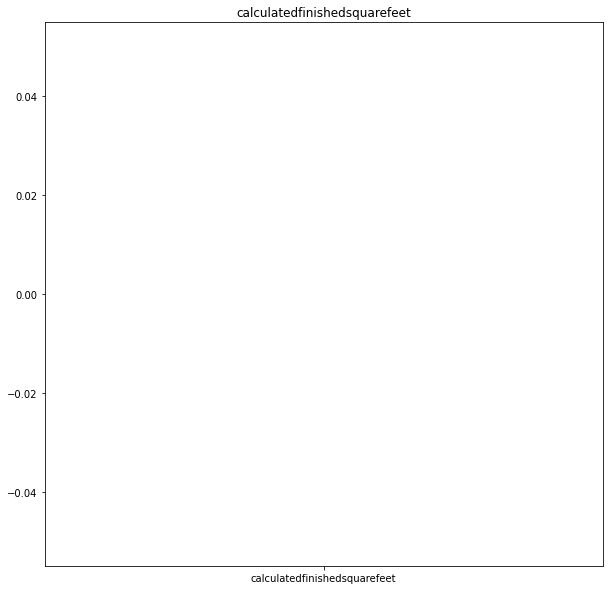

[finishedsquarefeet12]


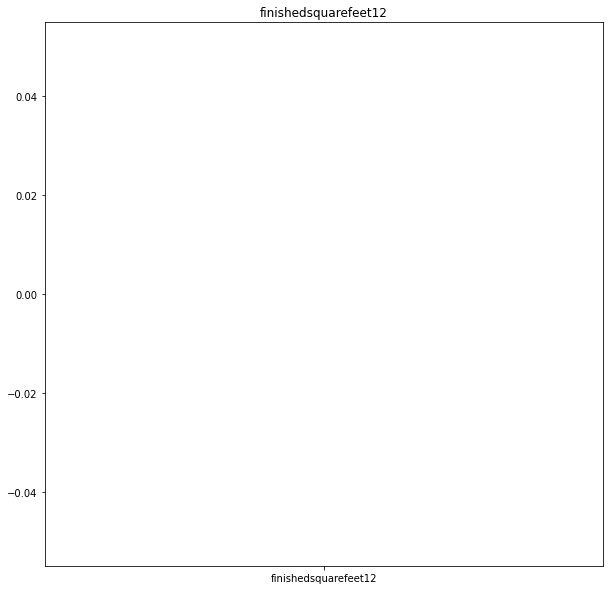

[fips]


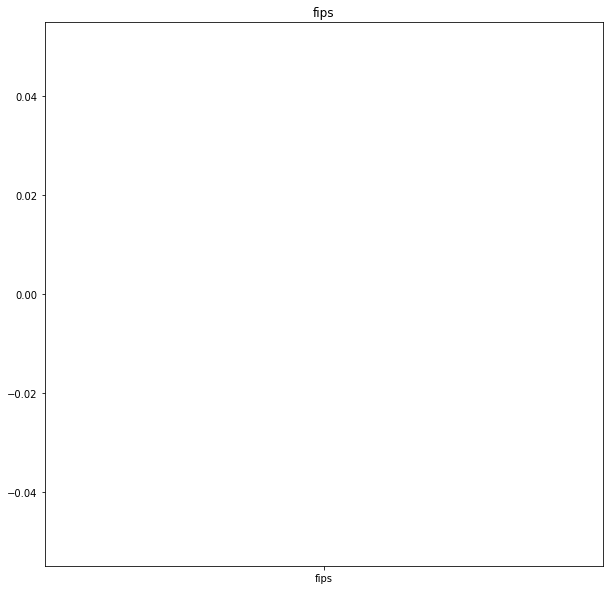

[fullbathcnt]
TypeError
[heatingorsystemtypeid]


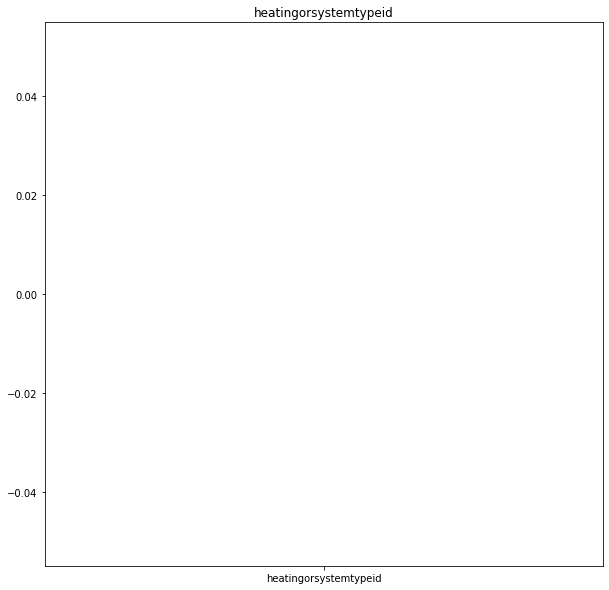

[latitude]


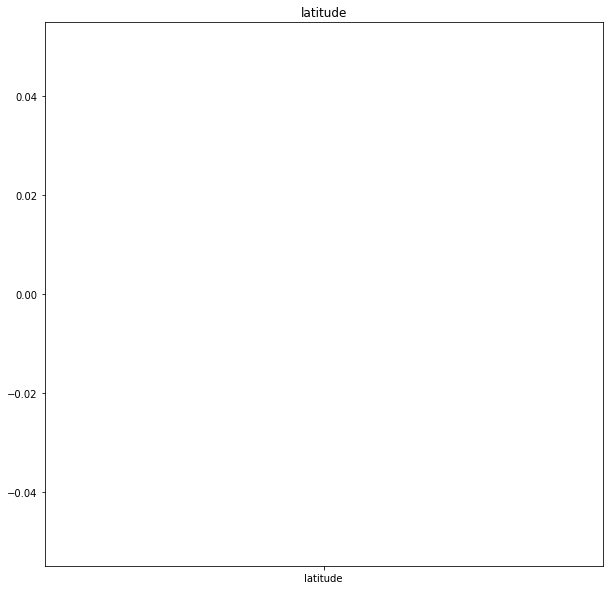

[longitude]


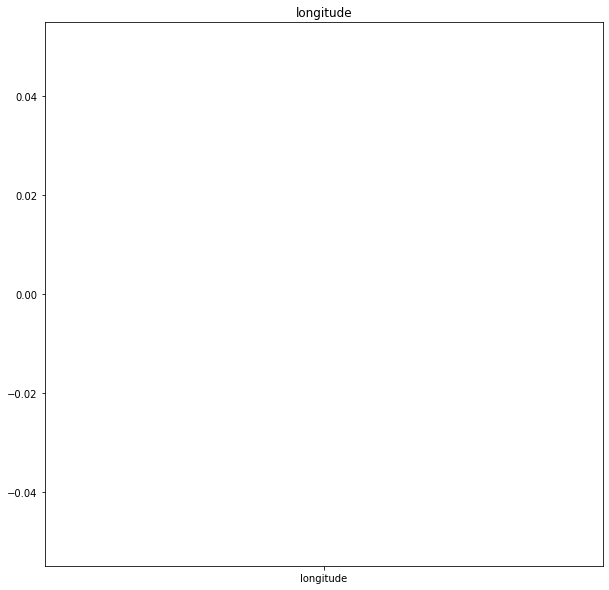

[lotsizesquarefeet]


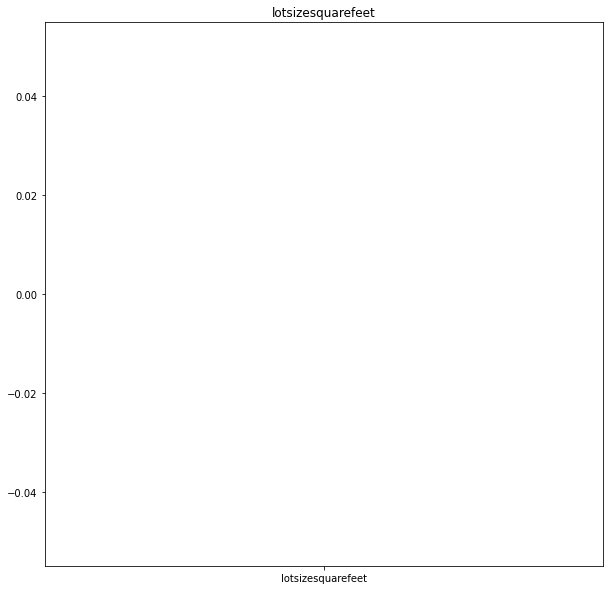

[propertylandusetypeid]


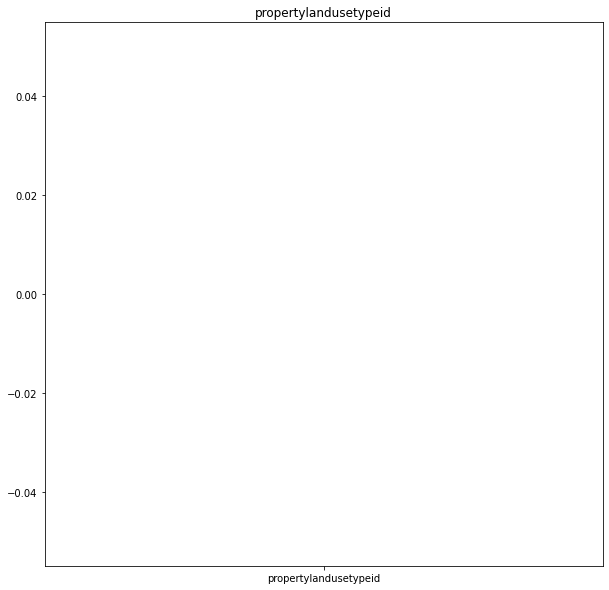

[rawcensustractandblock]


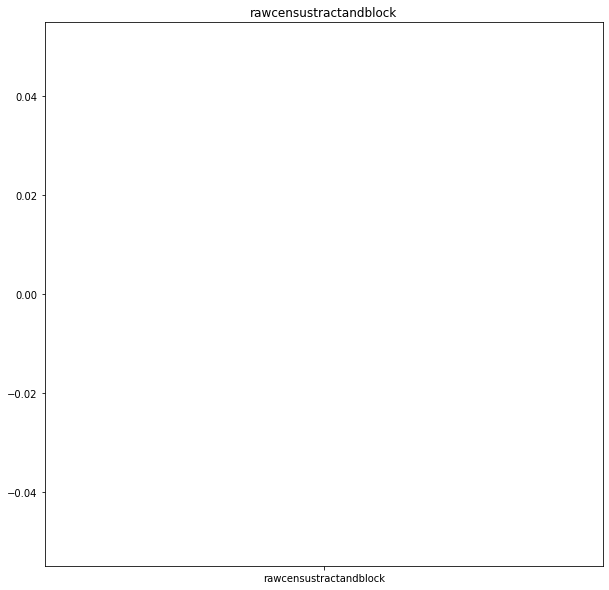

[regionidcity]


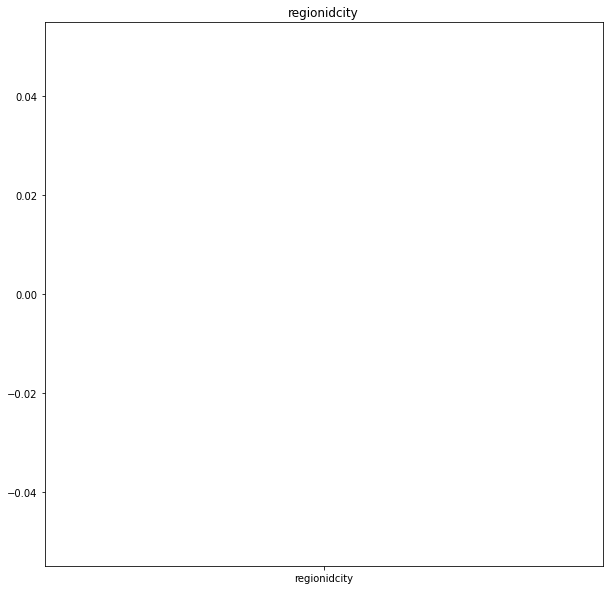

[regionidcounty]


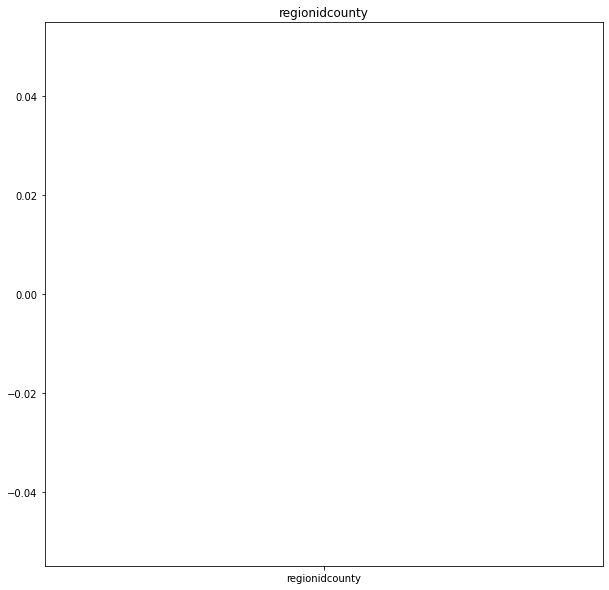

[regionidzip]


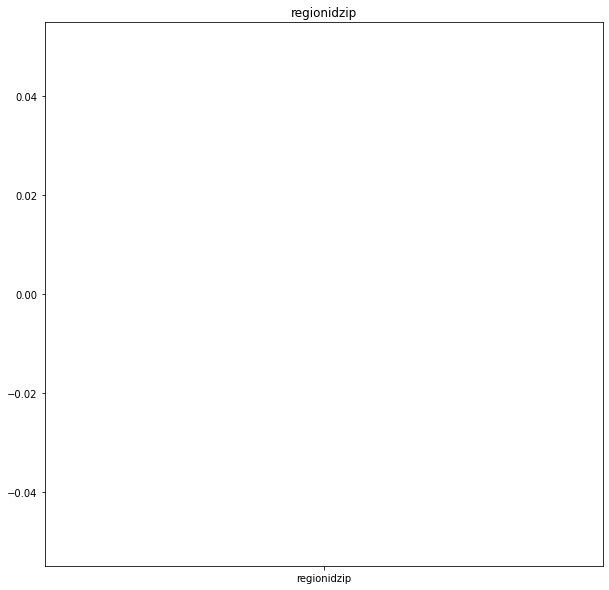

[roomcnt]


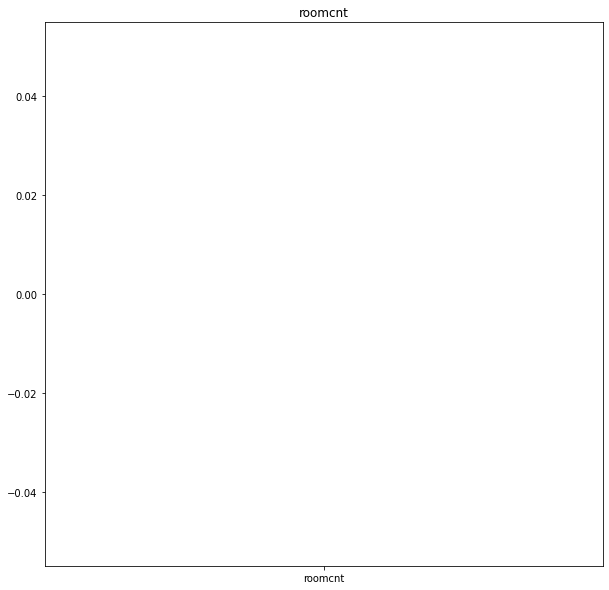

[threequarterbathnbr]
TypeError
[unitcnt]


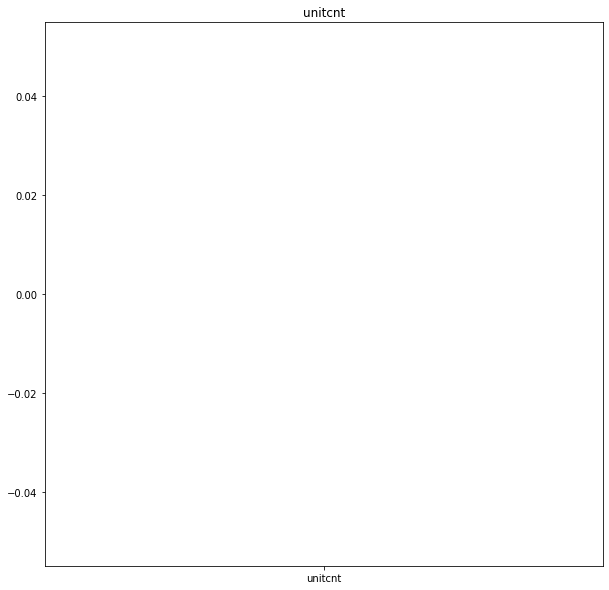

[yearbuilt]


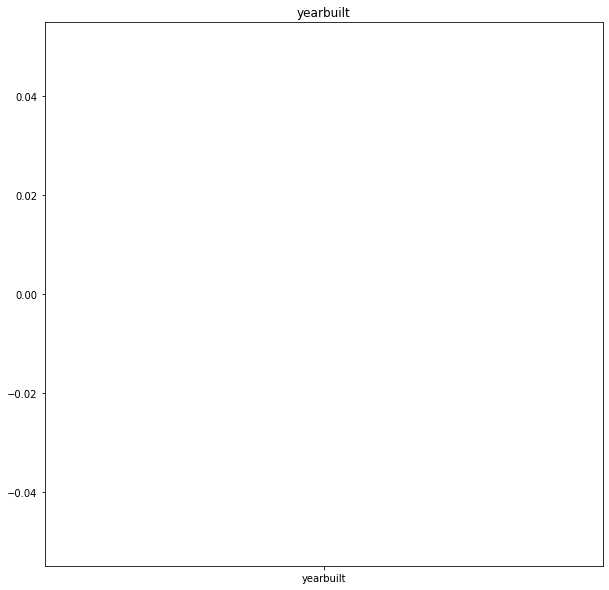

[structuretaxvaluedollarcnt]


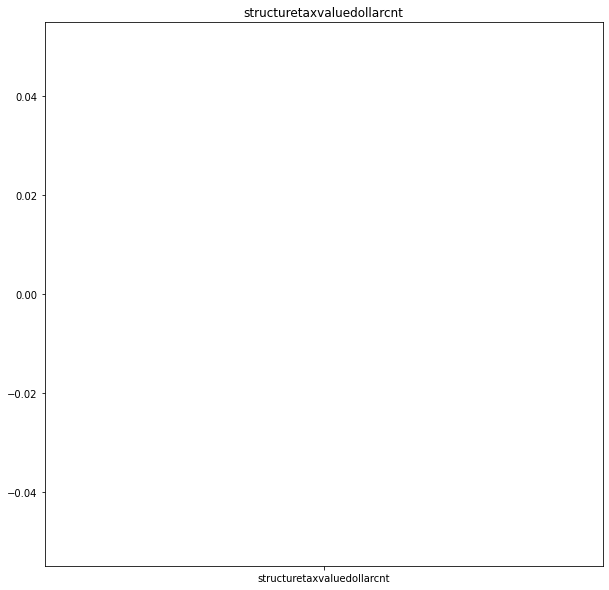

[taxvaluedollarcnt]


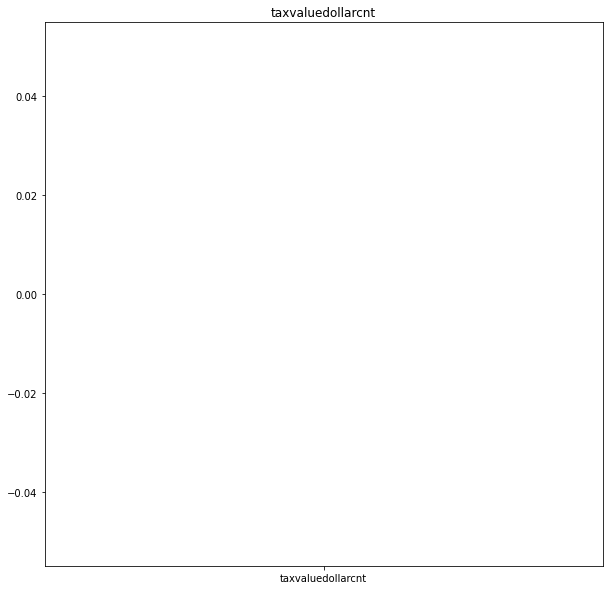

[assessmentyear]


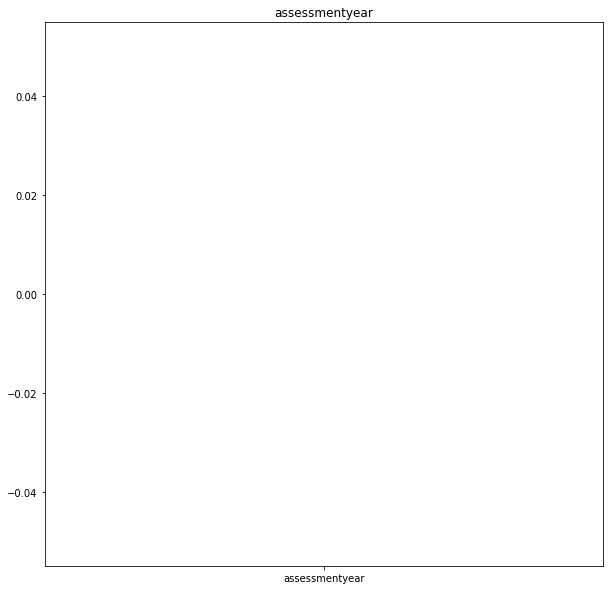

[landtaxvaluedollarcnt]


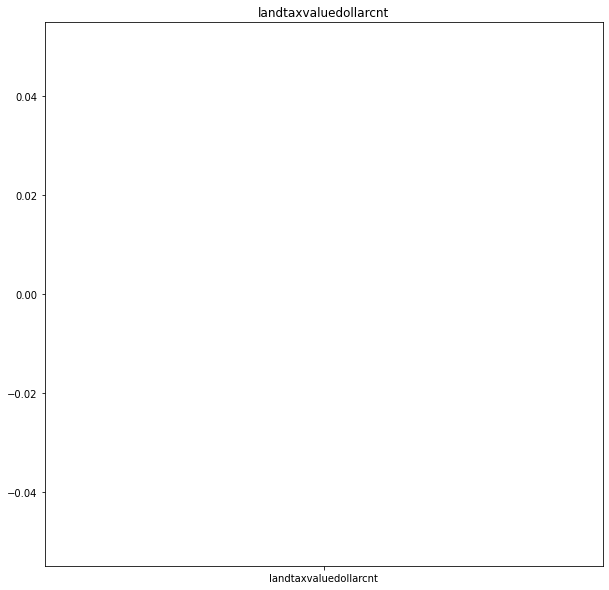

[taxamount]


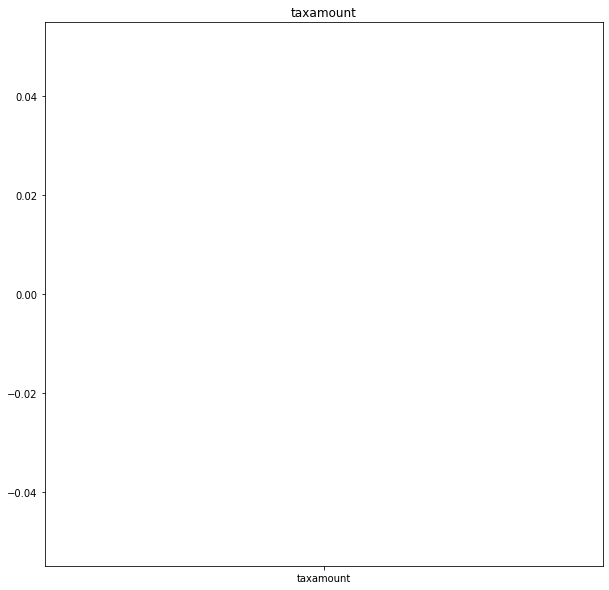

[censustractandblock]


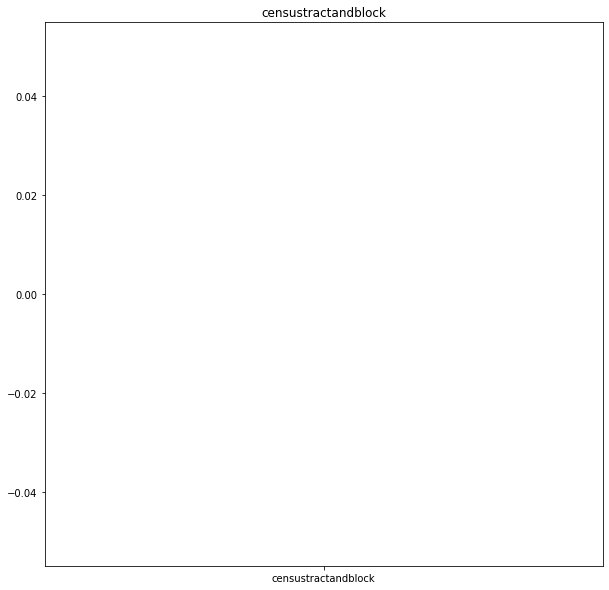

[logerror]


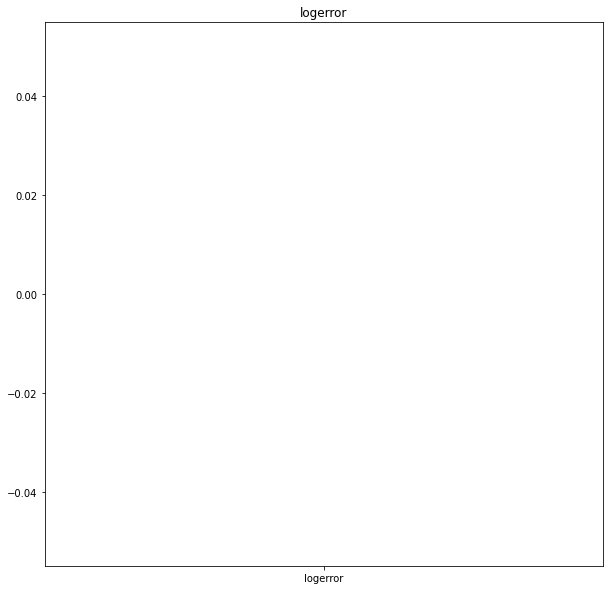

[transactiondate]
TypeError


In [ ]:
for col in df_2016:
  if 'parcelid' != col and 'propertycountylandusecode' != col:
    print("[" + col + "]")
    try:
      df_2016[col].plot.box(title =col, figsize =(10,10))
      plt.show()
    except TypeError:
      print("TypeError")

#Exporting Prepared Data

Now that our dataset is properly cleaned, we can export it so we can proceed with further elaboration. 

In [ ]:
with open('/gdrive/MyDrive/Progetto DWM/Data/processes_data_2016.csv', 'w') as f:
  f.write(df_2016.to_csv(index =False))

print('/gdrive/MyDrive/Progetto DWM/Data/processes_data_2016.csv contains:')
!cat /gdrive/MyDrive/Progetto%20DWM/Data/processes_data_2016.csv

In [ ]:
from googleapiclient.http import MediaFileUpload

file_metadata = {
  'name': 'Sample file',
  'mimeType': 'text/plain'
}
media = MediaFileUpload('/gdrive/MyDrive/Progetto DWM/Data/processes_data_2016.csv', 
                        mimetype='text/plain',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))